<a href="https://colab.research.google.com/github/angeloBuso/algoritmos_ML/blob/main/Template_ConstManual_Regressor_DotMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/angeloBuso/main/image/Imagem2-notebook.png">

---
## Template construção regressor Linear - Linear Mode <a class="anchor" id="0.1"></a>

# **Índice**
1.	[Compreensão Problema de Negócio](#1)
    - 1.1. [Dicionário dados](#1.1)
2.	[Coleta Dados](#2)
    - 2.1. [Carga dados](#2.1)
3.	[Análise Exploratória](#3)
    - 3.1 [Visão Geral dataSet](#3.1)
        - a [Pandas Profile Report](#a)
4. [Pré-Processamento dados](#4)
    - 4.1 [Transformação de Atributos](#4.1)
5. [Seleção Algoritmo](#5)
    - 5.1. [(i) Construção do Algoritmo](#5.1.i)
        - 5.1.1 [criando parâmetros](#5.1.1.i)
        - 5.1.2 [Fit do Modelo](#5.1.2.i)
        - 5.1.3 [Predict do Modelo](#5.1.3.i)
            - 5.1.3.1 [Plotando regra de regressão ](#5.1.3.1.i)
    - 5.2. [(ii) Stats Models](#5.2.ii)
        - 5.2.1 [Modelo](#5.2.1.ii)
        - 5.2.2 [Fit do Modelo](#5.2.2.ii)
        - 5.2.3 [Predict do Modelo](#5.2.3.ii)

In [1]:
# Bibliotecas usadas no projeto

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
from matplotlib import style
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **1. Compreensão Problema de Negócio** <a class="anchor" id="1"></a>

**Matrizes** na matemática é a forma de representar conjunto de informações dispostos entre linhas e colunas, sendo $ A_{mxn} $, onde A: representa a matriz; ***m*** é a quantidade de linhas e ***n*** é a quantidade de colunas. Ou seja, é a forma tabular de representar os dados, sendo que cada elemento possui um endereço único, composto pelo cruzamento entre a linha (*i*) e coluna (*j*) $ a_{ij} $.

**Operações com matrizes** são muito úteis para soluções de **sistemas de equações** complexos. Em **ciência de dados**, cálculos com matrizes são muito usados para multiplicar valores de entrada e saídas. Além de serem úteis no treinamento de redes neurais profundas, que de forma simplista **deep learning** é a multiplicação das matrizes de *dados de entradas* com os *pesos*. Sem mencionar o fato de que com matrizes, podemos representar nossos dataSet's de forma tabular, com seus registros (linhas) e atributos (colunas).

Objetivo desse notebook é mostrar como as matrizes são responsáveis para encontrar os **coeficientes** de algoritmos que usam a **Regressão Linear**. Ou seja, a matemática de um modelo de regressor, usando apenas cálculos com matrizes.

Antes de começar apenas uma breve explicação de como funciona um modelo regressor, se tratando de regressão simples e aprendizagem supervisionada!!

Em problemas de regressão, busca-se prever valores numéricos e considerando aprendizagem supervisioada, onde tenho dados de entrada (X) e dados de saída (Y), algoritmos regressores aprendem qual os melhores **pares de parâmetros/coeficiente** que define uma **reta de regressão**. Com esta reta de regressão, dado um novo valor de entrada, conseguimos saber qual seu correspondente, logo a reta de regressão é o nosso modelo *modelo preditivo*.


Nesse notebook, usaremos as multiplicação de **matrizes** para encontrar os melhores parâmetros $b_0$ e $b_1$ que satisfaça a equação linear, $ Y= b_0 + b_1*X $ , dado que é conhecido apenas o **Y** e o **X**.



[Índice](#0.1)

### **1.1 Dicionário dados** <a class="anchor" id="1.1"></a>


[Índice](#0.1)

## **2. Coleta Dados** <a class="anchor" id="2"></a>

Para esse projeto, apenas didaticamente, usaremos dados gerados aleatórios. Onde:

    * X será os dados de entrada, variável explanatória
    * Y são os dados de saída, o resultado.
    
Apenas para reforçar conceitos, o objetivo de usar dados histórico e apresentar aos modelos os dados de entrada e suas respectivas saídas, é a possibilidade dos algoritmos identificarem a relação entre esses dados e completar a equação $ Y= b_0 + b_1*X $.

Neste exemplo o **X** poderia ser o preço de uma ação de empresas listada na B3 - Bolsa de Valores Brasileira e **Y** a quantidade de vezes que essa ação e mencionada nas redes sociais. Aplicabilidade é muito ampla!!!

[Índice](#0.1)

### **2.1 Carga dados** <a class="anchor" id="2.1"></a>
DICA: até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel); acima 3 dim NUMPY (nparray)

[Índice](#0.1)

In [2]:
# Gerando 200 observaççoes de dados aelatórios
obs = 200

# X -> Dados de entrada
X = np.linspace(-2, 2, num= obs)

# Y -> Dados saída (adicionamos, de forma randômica, nos dados de entrada uma distribuição normal méd=0 e desv= 1)
Y = X + np.random.normal(0,1, size= obs)

## 3. Análise Exploratória <a class="anchor" id="3"></a>


### 3.1 Visão Geral dataSet **<a class="anchor" id="3.1"></a>
Estatística Descritiva:*tipo Objeto; *tipo Dados; *shape - !Dimensionalidade; *Indices; *describe dados

[Índice](#0.1)

Os dados são vetores

In [3]:
print('vetor de X', X.shape)
print('vetor de Y', Y.shape)

vetor de X (200,)
vetor de Y (200,)


De forma visual, identificamos como estão dispersos os dados

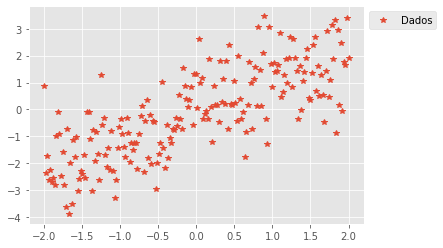

In [4]:
style.use('ggplot')
plt.plot(X, Y, '*', label= 'Dados')
plt.legend(loc= 'upper left', bbox_to_anchor= (1,1));

Exercitando a interpretação, a medida que o eixo X (horizontal) aumenta, observa-se uma correlação positiva do eixo Y (vertical).

## Pandas Profile Report <a class="anchor" id="a"></a>
[Índice](#0.1)

In [5]:
#pp.ProfileReport(df)

## 4. Pré-Processamento dados <a class="anchor" id="4"></a>
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

Para este notebook vamos (i.) excluir do nosso conjunto de dados os atributos que não usaremos, (ii.) identificar as variáveis preditoras e a variável alvo, (iii.) visualizar como estão dispostos os preditores e (iv.) dividir conjunto de dados em variáveis independentes e variável dependente para separar entre dados de treino e dados de teste.

[Índice](#0.1)

### 4.1 Transformação de Atributos <a class="anchor" id="4.1"></a>

Etapa na qual transformamos os atributos para o formato que os algortimos esperam receber, verificação de valores Missing, alteração do tipo de dados na carga, entre outos.

Dicas:

ALTERAR NOMES DE COLUNAS:  
* i. (a) crio uma lista com nomes, (b) aplico usando o atributo .columns, atribuindo a lista de nomes
* ii. dados = dados.rename(columns={'OldName': 'NewOld', 'OldName': 'NewOld'})

ALTERANDO INDICES:
* dataSet.set_index('Coluna', (se data)inplace = True)

INCLUINDO NOVA COLUNA:
* i. dataSet[novacoluna]= dataSet[coluna].map(lambda x: função)
* ii. dataSet[novacoluna] = dataSet.ColunaExistente.map(funçãoqueCriou)
                           
EXCLUSÃO ATRIBUTO SEM RELEVÂNCIA:
* data= data.drop(columns= (vetor de colunas à exluir))

TRANSFORMANDO STRING EM NÚMEROS / VICE-VERSA:
* i. dict = {'no':0,'yes':1}
* ii. dataSet[coluna] = dataSet[coluna].map(dict)


[Índice](#0.1)

Como o escopo do projeto é o uso de **matrizes**, iremos transformar nossos vetores de dados no formato desejado.

In [6]:
# vetor que contém o 'bias' - viés. Para uso de matrizes tal atributo auxilia na linearidade e previsão do modelo
bias = np.ones(obs)

Construindo a Matriz de entrada, que será uma **matriz aumentada** do vetor de entrada **X** e o vetor **bias**

In [7]:
X_matriz = np.matrix(np.column_stack((X, bias)))
print('X agora é uma matriz com {} linhas e {} colunas'.format(X_matriz.shape[0], X_matriz.shape[1]))

X agora é uma matriz com 200 linhas e 2 colunas


Construindo a matriz de saída. Representamos pela transposta para organizar os dados em linhas 

In [8]:
Y_matriz = np.transpose(np.matrix(Y))
print('Y agora é uma matriz com {} linhas e {} colunas'.format(Y_matriz.shape[0], Y_matriz.shape[1]))

Y agora é uma matriz com 200 linhas e 1 colunas


## 5. Seleção Algoritmo <a class="anchor" id="5"></a> 

Como os **Regressores** funcionam?

Em problemas de regressão, onde se busca prever valores numéricos e considerando aprendizagem supervisioada, onde tem-se dados de entrada (X) e dados de saída (Y), algoritmos regressores **aprendem** qual os melhores **pares de parâmetros/coeficiente** que define a melhor **reta de regressão** e satisfaça a seguinte equação $ Y= b_0 + b_1*X $ . Para tal, como no início do aprendizado não se sabe os valores desses parâmetros/coeficientes ($b_0$ e $b_1$ - regressão simples) os algoritmos podem usar técnicas de **(a.)** multiplicação entre matrizes, considerando *matrizes aumentadas*, *escalonamento de matrizes* e *matrizes inversas* e **(b.)** método dos Mínimos Quadrados, que minimizará a soma das distâncias ao quadrado dos pontos de (X,Y) da reta de regressão prevista (^Y).

Para nosso propósito usaremos a técnica com matrizes para demonstrar o calculo dos parâmetros. Em seguida, usando um algoritmo de framework StatsModel (biblioteca estatísticas)

[Índice](#0.1)

## 5.1 (i) - Construção do Algoritmo <a class="anchor" id="5.1.i"></a>

Um modelo de ML é o uso iterativo de operações aninhadas de matemática e estatística, com uso intensivo de ciências da computação.

[Índice](#0.1)

#### 5.1.1 criando parâmetros <a class="anchor" id="5.1.1.i"></a>
Com as matrizes a devidamente criadas e aumentadas, iremos utilizar a **multiplicação de matrizes** para escaloná-las.

Cabe destacar a regra básica para **multiplicação matricial**:
* Multiplicação matricial é o somatório da multiplicação entre *linhas* da 1° matriz pelas *colunas* da 2° matriz.
* O número de colunas da matriz da esquerda **deve** ser igual ao número de linhas da matriz da direita
* O output da multiplicação será uma matriz de tamanho $mxn$, sendo m= quantidade linhas da 1° matriz e n= quantidade colunas 2° matriz.

[Índice](#0.1)

In [9]:
# matriz aumentada de entrada escalonada -> atendida regra 2 de multiplicação 
X_matriz_esc = X_matriz.transpose().dot(X_matriz)
X_matriz_esc

matrix([[269.34673367,   0.        ],
        [  0.        , 200.        ]])

In [10]:
# matriz de saída escalonada -> atendida regra 2 de multiplicação 
Y_matriz_esc = X_matriz.transpose().dot(Y_matriz)
Y_matriz_esc

matrix([[288.66357163],
        [-18.42834924]])

#### 5.1.2 treino modelo (.fit) <a class="anchor" id="5.1.2.i"></a>
É a matriz determinante, dada pelo produto da multiplicação matricial da inversa das matrizes escalonada. 

[Índice](#0.1)

In [11]:
coeficientes= np.linalg.inv(X_matriz_esc).dot(Y_matriz_esc).tolist()
b1, b0 = coeficientes

In [12]:
%timeit coeficientes= np.linalg.inv(X_matriz_esc).dot(Y_matriz_esc).tolist()

The slowest run took 27.70 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 22.2 µs per loop


In [13]:
print('A função linear é Y^= {} + {}*X'.format(round(b0[0],2),round(b1[0],2)))

A função linear é Y^= -0.09 + 1.07*X


#### 5.1.3 teste modelo (.predict) <a class="anchor" id="5.1.3.i"></a>

Com o modelo treinado, identificamos os **melhores** valores dos coeficientes. Com a equação montada conseguimos encontrar/prever o valor de **Y**, usando valores de entrada **X**.

[Índice](#0.1)

In [14]:
# previsão = o resultado da equação linear 
y_pred = b0[0] + b1[0] * X

##### 5.1.3.1 Plotando regra de regressão <a class="anchor" id="5.1.3.1.i"></a>

[Índice](#0.1)

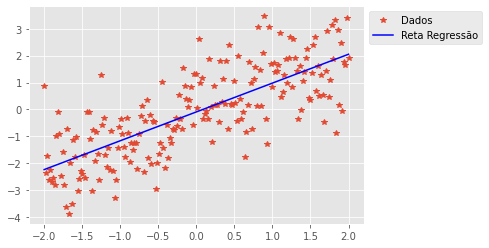

In [15]:
style.use('ggplot')
plt.plot(X, Y, '*', label= 'Dados')
plt.plot(X, y_pred, 'b', color= 'blue', label= 'Reta Regressão')
plt.legend(loc= 'upper left', bbox_to_anchor= (1,1));

## 5.2 (ii) - Stats Models <a class="anchor" id="5.2.ii"></a>

É uma biblioteca Python que fornece classes e funções para a **estimativa** de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados estatísticos. Ou seja, todas as operações matemáticas e estatísticas, de uma forma bem mais performática.

O algoritmo regressor da biblioteca espera receber um dataFrame como entrada, logo usaremos matrizes para converter em um dataFrame

[Índice](#0.1)

In [16]:
# convertendo os vetores em matrizes 200[linhas] x 1[colunas]
X_SM = np.transpose(np.matrix(X))
Y_SM = np.transpose(np.matrix(Y))

# agrupando as duas matrizes em uma com 200[linhas] x 2[colunas]
df_SM = np.column_stack((X_SM, Y_SM))

# convertendo em um objeto tipo dateFrame
df = pd.DataFrame(df_SM)
df = df.rename(columns={0: 'X', 1: 'Y'})

#### 5.2.1 criar modelo <a class="anchor" id="5.2.1.ii"></a>

[Índice](#0.1)

In [17]:
regressor = smf.ols(formula = 'Y ~ X', data= df)

#### 5.2.2 treino modelo (.fit) <a class="anchor" id="5.2.2.ii"></a>


[Índice](#0.1)

In [18]:
modelo = regressor.fit()

In [19]:
%timeit modelo = regressor.fit()

The slowest run took 11.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.49 µs per loop


#### 5.2.3 teste modelo (.predict) <a class="anchor" id="5.2.3.ii"></a>


[Índice](#0.1)

In [20]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     266.9
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.51e-38
Time:                        12:34:33   Log-Likelihood:                -297.57
No. Observations:                 200   AIC:                             599.1
Df Residuals:                     198   BIC:                             605.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0921      0.076     -1.210      0.2

In [21]:
print("A função da reta de regressão é dado por: Y^= {} + {}*X".format(round(modelo.params['Intercept'],2), round(modelo.params['X'],2)))

A função da reta de regressão é dado por: Y^= -0.09 + 1.07*X


________________

Usando Matrizes ou usando algoritmo de regressão linear, encontramos os mesmos coeficientes. 

In [22]:
print('A função linear com matrizes é: \t\t Y^= {} + {}*X'.format(round(b0[0],2),round(b1[0],2)))
print('A função linear com algoritmo regressor é: \t Y^= {} + {}*X'.format(round(modelo.params['Intercept'],2), round(modelo.params['X'],2)))

A função linear com matrizes é: 		 Y^= -0.09 + 1.07*X
A função linear com algoritmo regressor é: 	 Y^= -0.09 + 1.07*X


A diferença é a performance do cálculo. Com uso de matrizes os coeficientes são encontrados em 27 microssegundos, ao passo que com o algoritmo regressor 11 microssegundo.

E performance faz toda a diferença quando temos **muitos registros e variáveis**  

Com isso concluimos que não precisamos *reinventar* a roda... podemos maximizar nosso tempo, no entando cabe a nós entender o mínimo que cada algoritmo realiza, pois ai saberemos personalizar e usar com mais eficiência!!